In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('spotify.csv')
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [8]:
df.shape

(440, 5)

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Artist,440,115,Drake,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Track Name,440,412,Annihilate (Spider-Man: Across the Spider-Vers...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Popularity,440.0,NaN,NaN,NaN,75.736364,9.886534,29.0,70.0,77.0,83.0,97.0
Duration (ms),440.0,NaN,NaN,NaN,206810.040909,53576.930289,81666.0,172778.5,201866.0,235119.75,501648.0
Track ID,440,413,39MK3d3fonIP8Mz9oHCTBB,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


1. .Load the dataframe and ensure data quality by checking for missing values and duplicate rows.
 Handle missing values and remove duplicate rows if necessary

In [9]:
df.isna().sum()
#There is no null value present in dataset

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [11]:
df.duplicated().sum()
# 27 values are duplicate

np.int64(27)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(413, 5)

2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

In [22]:
plt.figure(figsize=(12,20))
fig = px.histogram(df, x="Popularity", color_discrete_sequence=['darkred'] )
fig.update_layout(bargap=0.2)
fig.show()

<Figure size 1200x2000 with 0 Axes>

3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

In [24]:
fig = px.scatter(data_frame=df, x='Duration (ms)', y='Popularity', color_discrete_sequence=['crimson'])
fig.show()

4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist
 using a countplot.

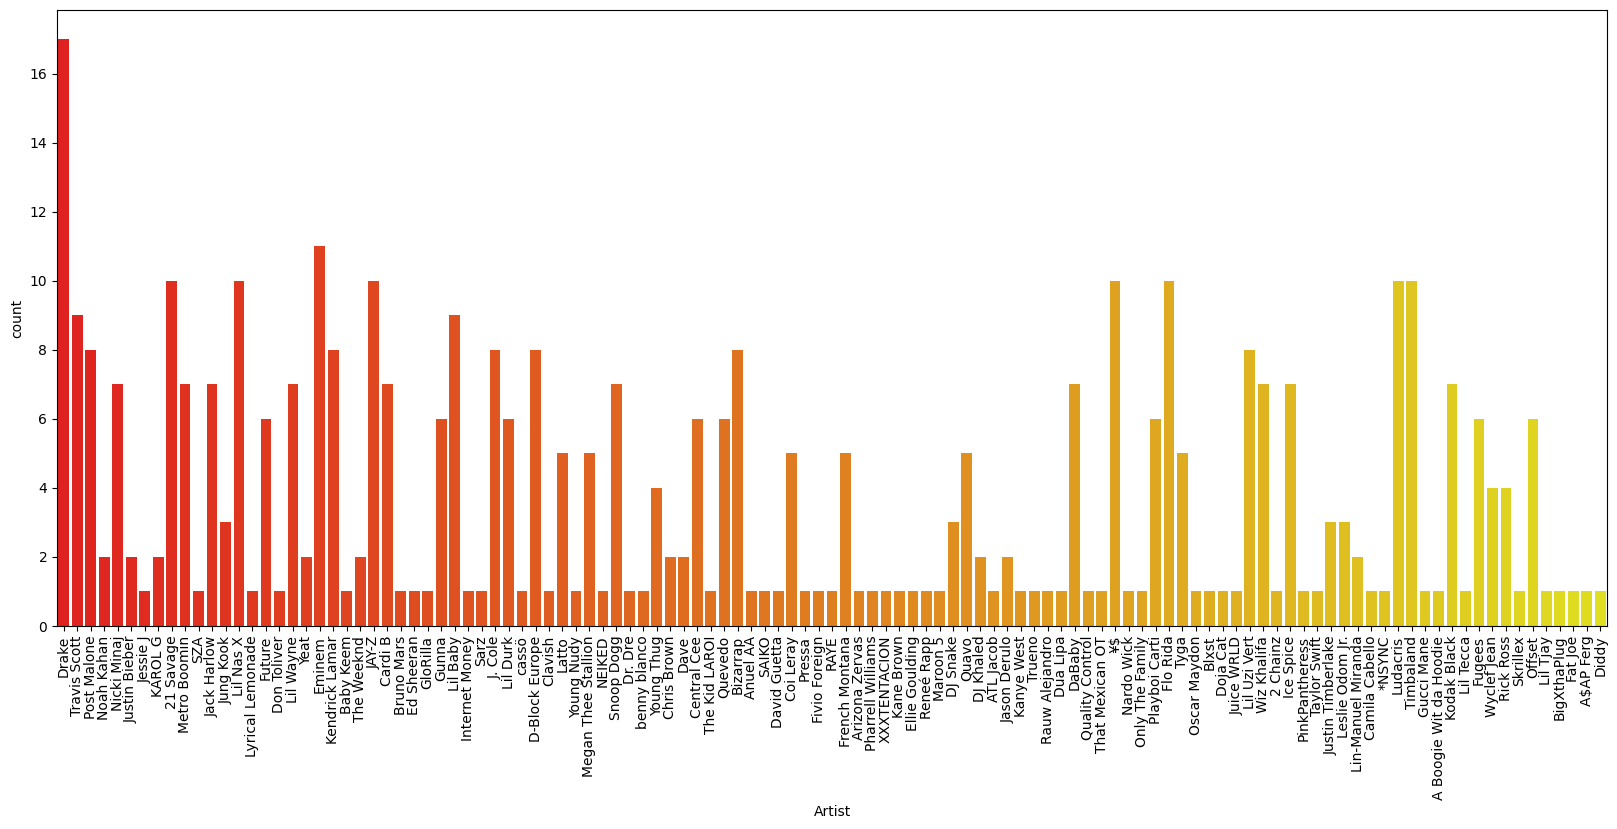

In [43]:
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='Artist', palette='autumn')
plt.xticks(rotation=90)
plt.show()
# Drake has highest numcer of tracks

5. .What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [87]:
df['Popularity'].unique().min()

np.int64(29)

In [90]:
df.groupby(['Artist','Track Name'])['Popularity'].min().sort_values(ascending=True).reset_index().head(5)

,Artist,Track Name,Popularity
0,Pressa,Attachments (feat. Coi Leray),29
1,Justin Bieber,Intentions,35
2,French Montana,Splash Brothers,44
3,Lil Baby,On Me - Remix,47
4,Wyclef Jean,911 (feat. Mary J. Blige),48


6. Among the top 5 most popular artists, which artist has the highest popularity on average?
 Calculate and display the average popularity for each artist.

In [132]:
df.groupby(['Artist'])['Popularity'].mean().sort_values(ascending=False).reset_index().head(5)

,Artist,Popularity
0,cassö,92.000000
1,Trueno,89.000000
2,David Guetta,87.000000
3,Travis Scott,86.555556
4,¥$,85.100000


7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [136]:
df.groupby(['Artist','Track Name'])['Popularity'].max().sort_values(ascending=False).reset_index().head(5)

,Artist,Track Name,Popularity
0,Jack Harlow,Lovin On Me,97
1,21 Savage,redrum,96
2,¥$,CARNIVAL,96
3,Travis Scott,FE!N (feat. Playboi Carti),93
4,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

<Figure size 1200x1000 with 0 Axes>

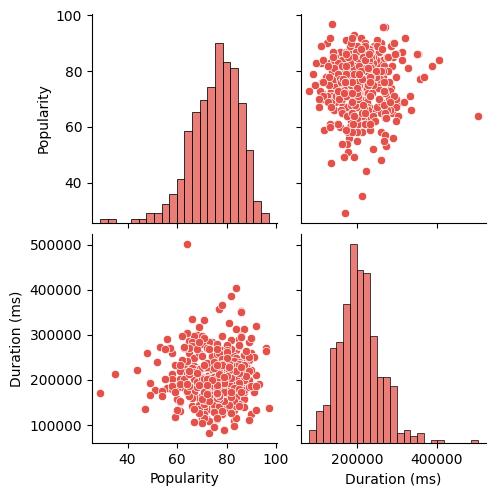

In [146]:
plt.figure(figsize=(12,10))
sns.set_palette("Spectral")
sns.pairplot(data=df)
plt.show()

9. .Does the duration of tracks vary significantly across different artists?
 Explore this visually using a box plot or violin plot.

In [161]:
df.groupby('Artist')['Duration (ms)'].mean().sort_values()

Artist
Justin Timberlake    116706.333333
PinkPantheress       131013.000000
cassö                132359.000000
That Mexican OT      133983.000000
Ice Spice            134405.142857
                         ...      
A$AP Ferg            283693.000000
Eminem               285642.181818
SAIKO                288000.000000
Kanye West           334253.000000
DJ Khaled            380824.000000
Name: Duration (ms), Length: 115, dtype: float64

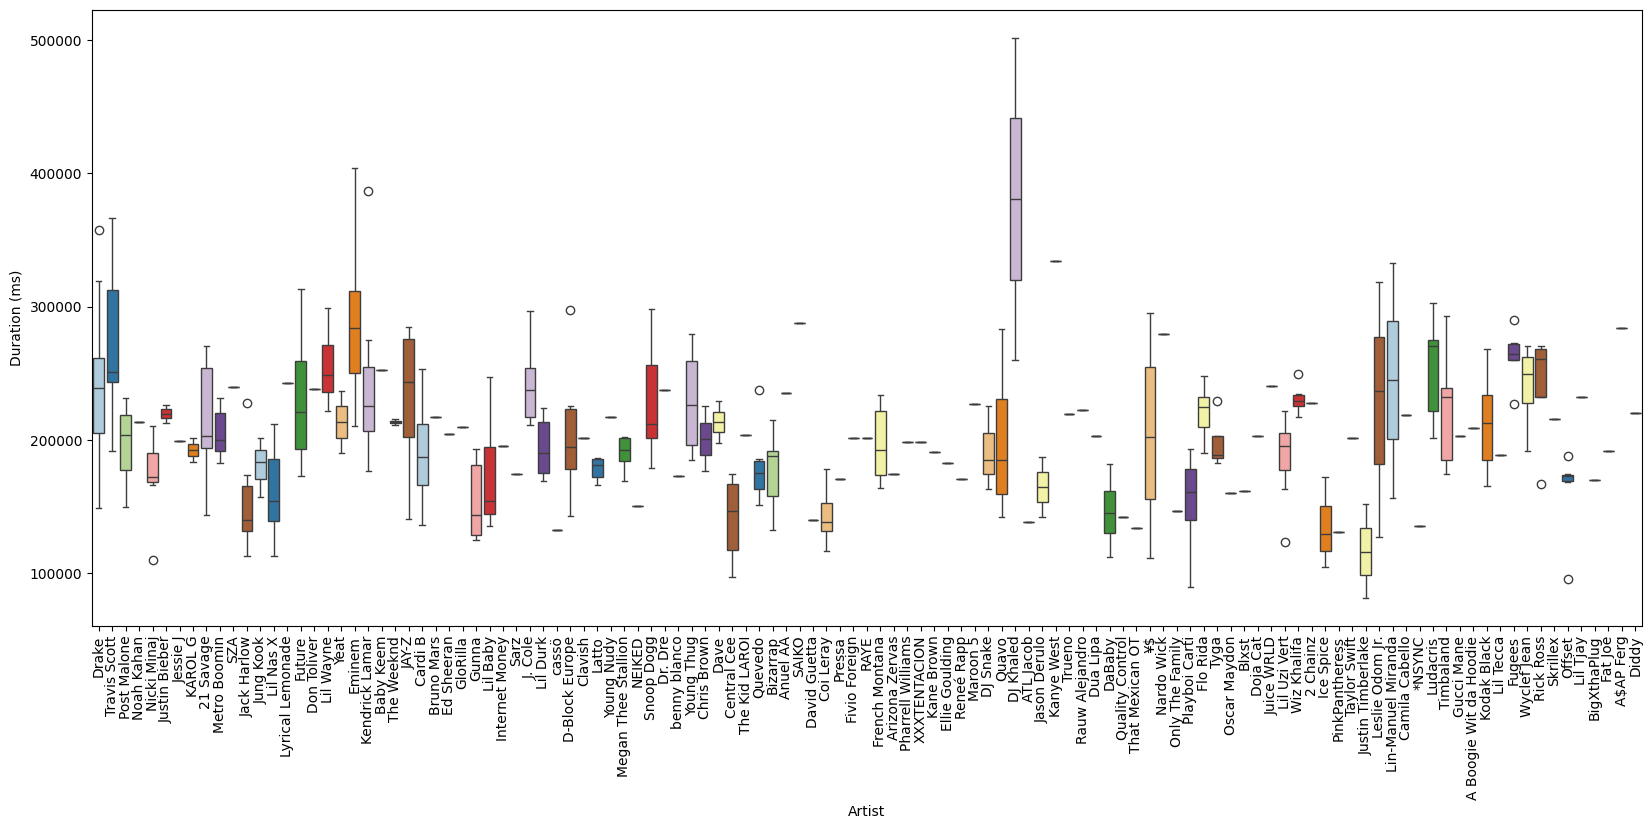

In [157]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, x='Artist', y='Duration (ms)', palette='Paired')
#sns.violinplot(data=df, x='Artist', y='Duration (ms)')
plt.xticks(rotation=90)
plt.show()

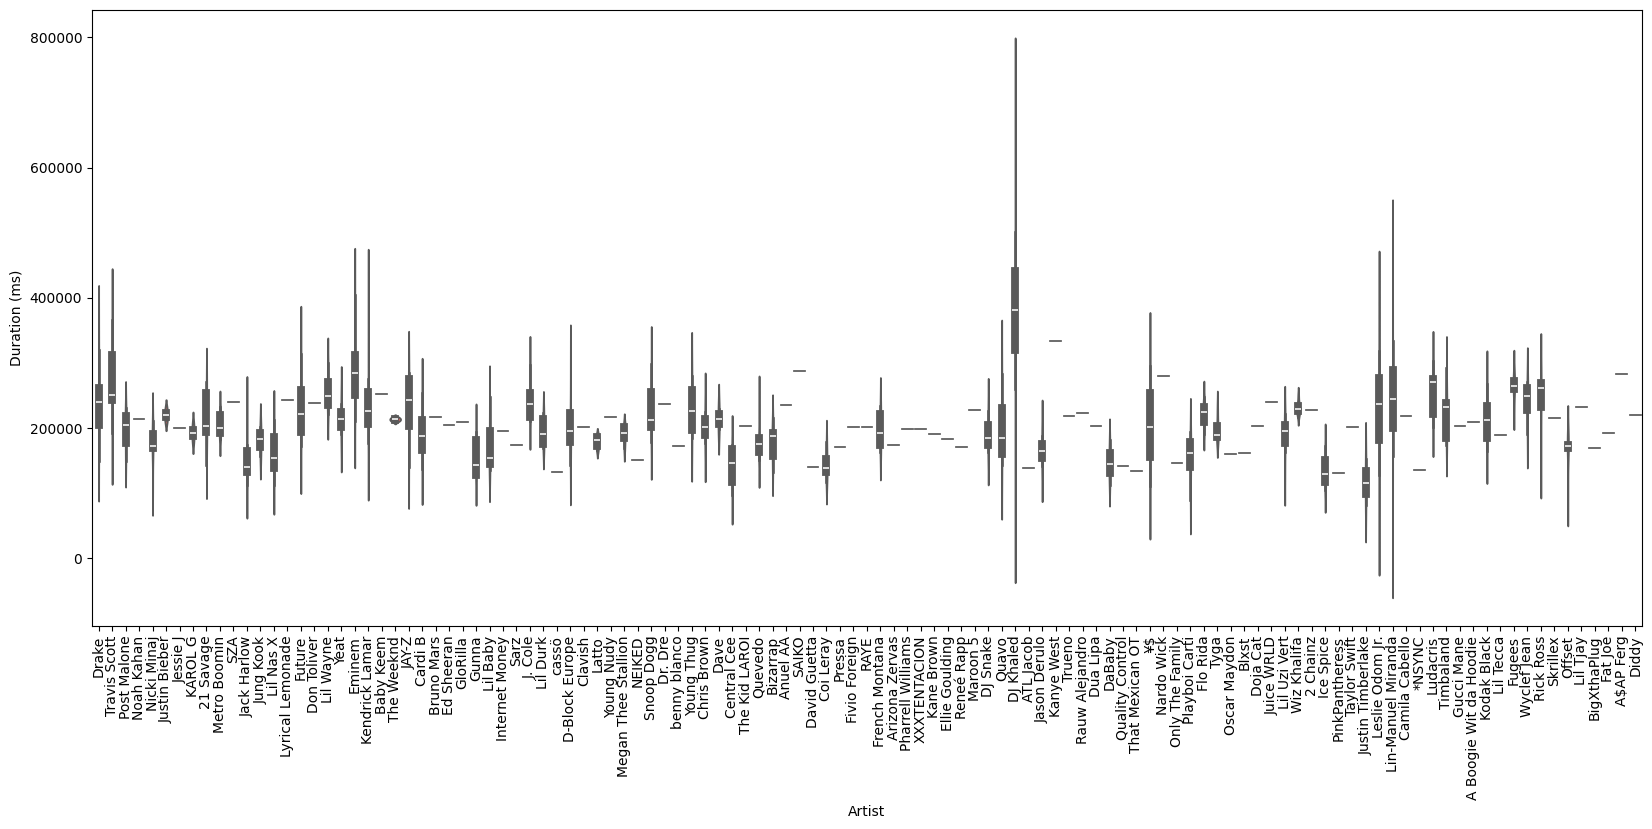

In [159]:
plt.figure(figsize=(20,8))
#sns.boxplot(data=df, x='Artist', y='Duration (ms)', palette='Paired')
sns.violinplot(data=df, x='Artist', y='Duration (ms)')
plt.xticks(rotation=90)
plt.show()

10. .How does the distribution of track popularity vary for different artists?
 Visualize this using a swarm plot or a violin plot.

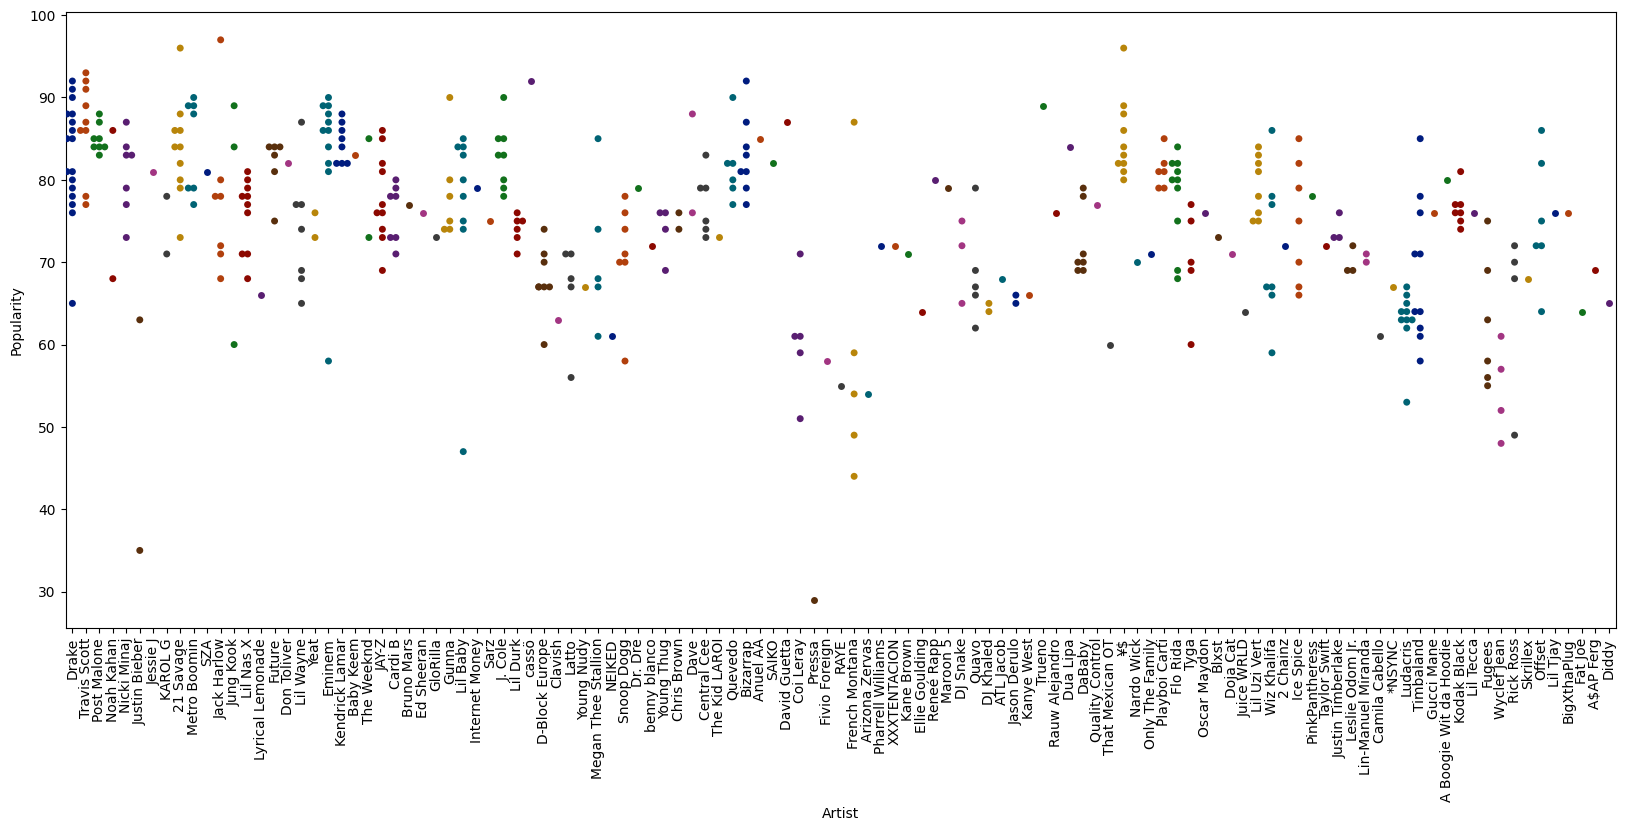

In [170]:
plt.figure(figsize=(20,8))
sns.swarmplot(data=df, x='Artist', y='Popularity', palette='dark')
#sns.violinplot(data=df, x='Artist', y='Popularity')
plt.xticks(rotation=90)
plt.show()

In [15]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')